In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json

statesofInterest = ['IOWA', 'INDIANA', 'ILLINOIS', 'KANSAS', 'MINNESOTA', 'MISSOURI', 'NEBRASKA', 'NORTH DAKOTA', 'SOUTH DAKOTA', 'OHIO']

In [51]:
def crop_yield(year_param):

     # These are the parameters in the API that you choose.
    ploads = {'format': 'JSON',
              'soucre_desc': 'SURVEY',
              'sector_desc': 'CROPS',
              'group_desc': 'FIELD CROPS',
              'commodity_desc': 'SOYBEANS',
              'prodn_practice_desc': 'ALL',
              'statisticcat_desc': 'POD COUNT',
              'agg_level_desc': 'STATE',
              'state_name': 'IOWA',
              'year__GT': year_param,
              #'unit_desc': 'BU / ACRE',
              'prodn_practice_desc': 'ALL PRODUCTION PRACTICES'
              }
    # key (make a parameter)
    r = requests.get("https://quickstats.nass.usda.gov/api/api_GET/?key=1C757E50-5169-30CC-BEFD-40A5C3E2A43D", params=ploads)
    # execute get request
    dt1 = json.dumps(r.json(), indent=2, sort_keys=True)
    # make it json format
    obj1 = json.loads(dt1)

    # collect relevant data for each object created
    dt2 = []
    for i in obj1["data"]:
        dt2.append([i["year"], i["reference_period_desc"], i["commodity_desc"], i["Value"], i['unit_desc'], i['state_name']])
        #dt2.append([i])
    # convert from dictionary format to pandas
    dt3 = pd.DataFrame.from_dict(dt2)
    return dt3

In [52]:
ts = crop_yield('1800')
ts.to_csv("tmp.csv")

     Year             Forecast      Crop  Value             Unit State
114  1987  YEAR - NOV FORECAST  SOYBEANS   1427  PODS / 18 SQ FT  IOWA
113  1988  YEAR - NOV FORECAST  SOYBEANS   1149  PODS / 18 SQ FT  IOWA
112  1989  YEAR - NOV FORECAST  SOYBEANS   1316  PODS / 18 SQ FT  IOWA
109  1990                 YEAR  SOYBEANS   1330  PODS / 18 SQ FT  IOWA
111  1990  YEAR - SEP FORECAST  SOYBEANS   1462  PODS / 18 SQ FT  IOWA
110  1990  YEAR - NOV FORECAST  SOYBEANS   1321  PODS / 18 SQ FT  IOWA
108  1991  YEAR - SEP FORECAST  SOYBEANS   1406  PODS / 18 SQ FT  IOWA
107  1991  YEAR - NOV FORECAST  SOYBEANS   1451  PODS / 18 SQ FT  IOWA
106  1991                 YEAR  SOYBEANS   1456  PODS / 18 SQ FT  IOWA
105  1992  YEAR - SEP FORECAST  SOYBEANS   1501  PODS / 18 SQ FT  IOWA


,Forecast,Crop,Realized,Unit,State
Year,,,,,
1990,YEAR,SOYBEANS,1330,PODS / 18 SQ FT,IOWA
1991,YEAR,SOYBEANS,1456,PODS / 18 SQ FT,IOWA
1992,YEAR,SOYBEANS,1473,PODS / 18 SQ FT,IOWA
1993,YEAR,SOYBEANS,1340,PODS / 18 SQ FT,IOWA
1994,YEAR,SOYBEANS,1820,PODS / 18 SQ FT,IOWA
1995,YEAR,SOYBEANS,1616,PODS / 18 SQ FT,IOWA
1996,YEAR,SOYBEANS,1463,PODS / 18 SQ FT,IOWA
1997,YEAR,SOYBEANS,1461,PODS / 18 SQ FT,IOWA
1998,YEAR,SOYBEANS,1748,PODS / 18 SQ FT,IOWA


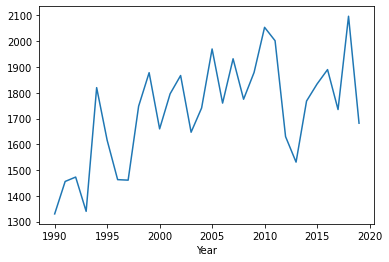

In [53]:
ts.columns = ['Year', 'Forecast', 'Crop', 'Value', 'Unit', 'State']
#ts['Value'] = ts['Value'].str.replace('NA', '').astype(int)

ts['Value'] = ts['Value'].str.strip()
ts['Value'] = ts['Value'].replace('(NA)', '0')
ts['Value'] = ts['Value'].str.replace(',', '').astype(int)

ts.sort_values('Year', inplace=True)
print(ts.head(10))

ts=ts.loc[ts['Forecast'] == "YEAR"]
ts.set_index('Year', inplace=True)
ts["Value"]=ts["Value"].astype("int")
ts["Value"].plot()
bokeh1=ts.copy()
bokeh1=bokeh1.rename(columns = {'Value':'Realized'})
bokeh1


     Year             Forecast      Crop  Value             Unit State
114  1987  YEAR - NOV FORECAST  SOYBEANS   1427  PODS / 18 SQ FT  IOWA
113  1988  YEAR - NOV FORECAST  SOYBEANS   1149  PODS / 18 SQ FT  IOWA
112  1989  YEAR - NOV FORECAST  SOYBEANS   1316  PODS / 18 SQ FT  IOWA
109  1990                 YEAR  SOYBEANS   1330  PODS / 18 SQ FT  IOWA
111  1990  YEAR - SEP FORECAST  SOYBEANS   1462  PODS / 18 SQ FT  IOWA
110  1990  YEAR - NOV FORECAST  SOYBEANS   1321  PODS / 18 SQ FT  IOWA
108  1991  YEAR - SEP FORECAST  SOYBEANS   1406  PODS / 18 SQ FT  IOWA
107  1991  YEAR - NOV FORECAST  SOYBEANS   1451  PODS / 18 SQ FT  IOWA
106  1991                 YEAR  SOYBEANS   1456  PODS / 18 SQ FT  IOWA
105  1992  YEAR - SEP FORECAST  SOYBEANS   1501  PODS / 18 SQ FT  IOWA


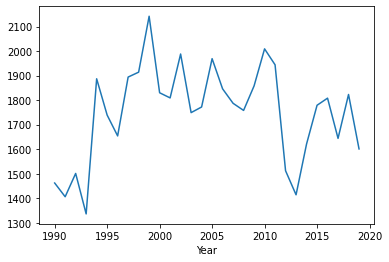

In [54]:
ts = crop_yield('1800')
ts.columns = ['Year', 'Forecast', 'Crop', 'Value', 'Unit', 'State']

ts['Value'] = ts['Value'].str.strip()
ts['Value'] = ts['Value'].replace('(NA)', '0')
ts['Value'] = ts['Value'].str.replace(',', '').astype(int)

ts.columns = ['Year', 'Forecast', 'Crop', 'Value', 'Unit', 'State']
ts.sort_values('Year', inplace=True)
print(ts.head(10))

ts=ts.loc[ts['Forecast'] == "YEAR - SEP FORECAST"]
ts.set_index('Year', inplace=True)
ts["Value"]=ts["Value"].astype("float")
ts["Value"].plot()

In [55]:
bokeh1= pd.concat([bokeh1, ts], axis=1).sort_index()
bokeh1=bokeh1.rename(columns = {'Value':'SepForecast'})
bokeh1.head()

,Forecast,Crop,Realized,Unit,State,Forecast,Crop,SepForecast,Unit,State
Year,,,,,,,,,,
1990,YEAR,SOYBEANS,1330,PODS / 18 SQ FT,IOWA,YEAR - SEP FORECAST,SOYBEANS,1462.0,PODS / 18 SQ FT,IOWA
1991,YEAR,SOYBEANS,1456,PODS / 18 SQ FT,IOWA,YEAR - SEP FORECAST,SOYBEANS,1406.0,PODS / 18 SQ FT,IOWA
1992,YEAR,SOYBEANS,1473,PODS / 18 SQ FT,IOWA,YEAR - SEP FORECAST,SOYBEANS,1501.0,PODS / 18 SQ FT,IOWA
1993,YEAR,SOYBEANS,1340,PODS / 18 SQ FT,IOWA,YEAR - SEP FORECAST,SOYBEANS,1336.0,PODS / 18 SQ FT,IOWA
1994,YEAR,SOYBEANS,1820,PODS / 18 SQ FT,IOWA,YEAR - SEP FORECAST,SOYBEANS,1887.0,PODS / 18 SQ FT,IOWA


     Year             Forecast      Crop  Value             Unit State
114  1987  YEAR - NOV FORECAST  SOYBEANS   1427  PODS / 18 SQ FT  IOWA
113  1988  YEAR - NOV FORECAST  SOYBEANS   1149  PODS / 18 SQ FT  IOWA
112  1989  YEAR - NOV FORECAST  SOYBEANS   1316  PODS / 18 SQ FT  IOWA
109  1990                 YEAR  SOYBEANS   1330  PODS / 18 SQ FT  IOWA
111  1990  YEAR - SEP FORECAST  SOYBEANS   1462  PODS / 18 SQ FT  IOWA
110  1990  YEAR - NOV FORECAST  SOYBEANS   1321  PODS / 18 SQ FT  IOWA
108  1991  YEAR - SEP FORECAST  SOYBEANS   1406  PODS / 18 SQ FT  IOWA
107  1991  YEAR - NOV FORECAST  SOYBEANS   1451  PODS / 18 SQ FT  IOWA
106  1991                 YEAR  SOYBEANS   1456  PODS / 18 SQ FT  IOWA
105  1992  YEAR - SEP FORECAST  SOYBEANS   1501  PODS / 18 SQ FT  IOWA


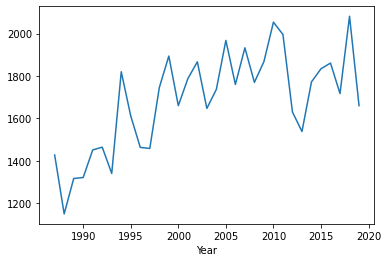

In [56]:
ts = crop_yield('1800')
ts.columns = ['Year', 'Forecast', 'Crop', 'Value', 'Unit', 'State']

ts['Value'] = ts['Value'].str.strip()
ts['Value'] = ts['Value'].replace('(NA)', '0')
ts['Value'] = ts['Value'].str.replace(',', '').astype(int)

ts.columns = ['Year', 'Forecast', 'Crop', 'Value', 'Unit', 'State']

ts.sort_values('Year', inplace=True)
print(ts.head(10))

ts=ts.loc[ts['Forecast'] == "YEAR - NOV FORECAST"]
ts.set_index('Year', inplace=True)
ts["Value"]=ts["Value"].astype("float")
ts["Value"].plot()

bokeh1= pd.concat([bokeh1, ts], axis=1).sort_index()
bokeh1=bokeh1.rename(columns = {'Value':'AugForecast'})

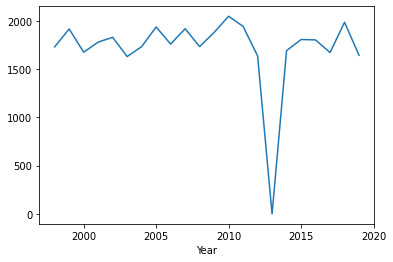

In [57]:
ts = crop_yield('1800')
ts.columns = ['Year', 'Forecast', 'Crop', 'Value', 'Unit', 'State']

ts['Value'] = ts['Value'].str.strip()
ts['Value'] = ts['Value'].replace('(NA)', '0')
ts['Value'] = ts['Value'].str.replace(',', '').astype(int)

ts=ts.loc[ts['Forecast'] == "YEAR - OCT FORECAST"]
ts.set_index('Year', inplace=True)
ts["Value"]=ts["Value"].astype("float")
ts["Value"].plot()
bokeh1= pd.concat([bokeh1, ts], axis=1).sort_index()
bokeh1=bokeh1.rename(columns = {'Value':'OctForecast'})

In [58]:
bokeh1.head()

,Forecast,Crop,Realized,Unit,State,Forecast,Crop,SepForecast,Unit,State,Forecast,Crop,AugForecast,Unit,State,Forecast,Crop,OctForecast,Unit,State
Year,,,,,,,,,,,,,,,,,,,,
1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YEAR - NOV FORECAST,SOYBEANS,1427.0,PODS / 18 SQ FT,IOWA,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YEAR - NOV FORECAST,SOYBEANS,1149.0,PODS / 18 SQ FT,IOWA,NaN,NaN,NaN,NaN,NaN
1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YEAR - NOV FORECAST,SOYBEANS,1316.0,PODS / 18 SQ FT,IOWA,NaN,NaN,NaN,NaN,NaN
1990,YEAR,SOYBEANS,1330.0,PODS / 18 SQ FT,IOWA,YEAR - SEP FORECAST,SOYBEANS,1462.0,PODS / 18 SQ FT,IOWA,YEAR - NOV FORECAST,SOYBEANS,1321.0,PODS / 18 SQ FT,IOWA,NaN,NaN,NaN,NaN,NaN
1991,YEAR,SOYBEANS,1456.0,PODS / 18 SQ FT,IOWA,YEAR - SEP FORECAST,SOYBEANS,1406.0,PODS / 18 SQ FT,IOWA,YEAR - NOV FORECAST,SOYBEANS,1451.0,PODS / 18 SQ FT,IOWA,NaN,NaN,NaN,NaN,NaN


In [59]:
bokeh1.iloc[:,[2,6,10,14,18]].to_csv("SoybeanPodCount.csv")

In [60]:
def crop_yield(year_param):

     # These are the parameters in the API that you choose.
    ploads = {'format': 'JSON',
              'soucre_desc': 'SURVEY',
              'sector_desc': 'CROPS',
              'group_desc': 'FIELD CROPS',
              'commodity_desc': 'SOYBEANS',
              'prodn_practice_desc': 'ALL',
              'statisticcat_desc': 'POD COUNT',
              'agg_level_desc': 'STATE',
              #'state_name': 'IOWA',
              'year__GT': year_param,
              #'unit_desc': 'BU / ACRE',
              'prodn_practice_desc': 'ALL PRODUCTION PRACTICES'
              }
    # key (make a parameter)
    r = requests.get("https://quickstats.nass.usda.gov/api/api_GET/?key=1C757E50-5169-30CC-BEFD-40A5C3E2A43D", params=ploads)
    # execute get request
    dt1 = json.dumps(r.json(), indent=2, sort_keys=True)
    # make it json format
    obj1 = json.loads(dt1)

    # collect relevant data for each object created
    dt2 = []
    for i in obj1["data"]:
        dt2.append([i["year"], i["reference_period_desc"], i["commodity_desc"], i["Value"], i['unit_desc'], i['state_name']])
        #dt2.append([i])
    # convert from dictionary format to pandas
    dt3 = pd.DataFrame.from_dict(dt2)
    return dt3

In [61]:
ts = crop_yield("1800")
ts.columns = ['Year', 'Forecast', 'Crop', 'Value', 'Unit', 'State']
ts.to_csv("tmp.csv")

ts['Value'] = ts['Value'].str.strip()
ts['Value'] = ts['Value'].replace('N/A', '0')
ts['Value'] = ts['Value'].replace('(NA)', '0')
ts['Value'] = ts['Value'].str.replace(',', '').astype(int)

ts.sort_values(['Year', 'State'], inplace=True)
print(ts.head(100))


      Year             Forecast      Crop  Value             Unit      State
79    1987  YEAR - NOV FORECAST  SOYBEANS   1064  PODS / 18 SQ FT   ARKANSAS
194   1987  YEAR - NOV FORECAST  SOYBEANS   1491  PODS / 18 SQ FT   ILLINOIS
309   1987  YEAR - NOV FORECAST  SOYBEANS   1426  PODS / 18 SQ FT    INDIANA
424   1987  YEAR - NOV FORECAST  SOYBEANS   1427  PODS / 18 SQ FT       IOWA
605   1987  YEAR - NOV FORECAST  SOYBEANS   1545  PODS / 18 SQ FT  MINNESOTA
...    ...                  ...       ...    ...              ...        ...
1006  1992                 YEAR  SOYBEANS   1404  PODS / 18 SQ FT       OHIO
1007  1992  YEAR - NOV FORECAST  SOYBEANS   1394  PODS / 18 SQ FT       OHIO
1008  1992  YEAR - SEP FORECAST  SOYBEANS   1462  PODS / 18 SQ FT       OHIO
69    1993                 YEAR  SOYBEANS   1327  PODS / 18 SQ FT   ARKANSAS
70    1993  YEAR - NOV FORECAST  SOYBEANS   1399  PODS / 18 SQ FT   ARKANSAS

[100 rows x 6 columns]


In [62]:
ts=ts.loc[ts['Forecast'] == "YEAR"]
ts.set_index('Year', inplace=True)
ts["Value"]=ts["Value"].astype("float")
ts = ts[ts.index > 1989]

In [63]:
ts.head()

,Forecast,Crop,Value,Unit,State
Year,,,,,
1990,YEAR,SOYBEANS,1588.0,PODS / 18 SQ FT,ARKANSAS
1990,YEAR,SOYBEANS,1460.0,PODS / 18 SQ FT,ILLINOIS
1990,YEAR,SOYBEANS,1396.0,PODS / 18 SQ FT,INDIANA
1990,YEAR,SOYBEANS,1330.0,PODS / 18 SQ FT,IOWA
1990,YEAR,SOYBEANS,1454.0,PODS / 18 SQ FT,MINNESOTA


In [64]:
#ts.groupby("State").plot("Value")

iowa1 = ts.loc[ts['State'].isin(["IOWA"])]
mich1 = ts.loc[ts['State'].isin(["OHIO"])]
nebr1 = ts.loc[ts['State'].isin(["NEBRASKA"])]

# gg = ts.groupby(['Year', 'State'])['Value'].sum().unstack().plot()  
# gg
#df_me.groupby(['Year', 'Platform'])['Global_Sales'].sum().unstack().plot()  

In [65]:


state1= pd.concat([iowa1["Value"], mich1["Value"], nebr1["Value"]], axis=1).sort_index()
state1.columns = ["Iowa", "Ohio", "Nebraska"]

state1.to_csv("SoybeanStates.csv")

In [66]:
ts

,Forecast,Crop,Value,Unit,State
Year,,,,,
1990,YEAR,SOYBEANS,1588.0,PODS / 18 SQ FT,ARKANSAS
1990,YEAR,SOYBEANS,1460.0,PODS / 18 SQ FT,ILLINOIS
1990,YEAR,SOYBEANS,1396.0,PODS / 18 SQ FT,INDIANA
1990,YEAR,SOYBEANS,1330.0,PODS / 18 SQ FT,IOWA
1990,YEAR,SOYBEANS,1454.0,PODS / 18 SQ FT,MINNESOTA
...,...,...,...,...,...
2019,YEAR,SOYBEANS,1921.0,PODS / 18 SQ FT,MISSOURI
2019,YEAR,SOYBEANS,1722.0,PODS / 18 SQ FT,NEBRASKA
2019,YEAR,SOYBEANS,1195.0,PODS / 18 SQ FT,NORTH DAKOTA


In [67]:
import collections
ts.sort_values(['State', 'Year'], inplace=True)
occurrences = collections.Counter(ts["State"])
print(occurrences)
ts


Counter({'ILLINOIS': 30, 'INDIANA': 30, 'IOWA': 30, 'MINNESOTA': 30, 'MISSOURI': 30, 'NEBRASKA': 30, 'OHIO': 30, 'ARKANSAS': 28, 'KANSAS': 16, 'NORTH DAKOTA': 16, 'SOUTH DAKOTA': 16})


,Forecast,Crop,Value,Unit,State
Year,,,,,
1990,YEAR,SOYBEANS,1588.0,PODS / 18 SQ FT,ARKANSAS
1991,YEAR,SOYBEANS,1327.0,PODS / 18 SQ FT,ARKANSAS
1992,YEAR,SOYBEANS,1705.0,PODS / 18 SQ FT,ARKANSAS
1993,YEAR,SOYBEANS,1327.0,PODS / 18 SQ FT,ARKANSAS
1994,YEAR,SOYBEANS,1673.0,PODS / 18 SQ FT,ARKANSAS
...,...,...,...,...,...
2015,YEAR,SOYBEANS,1563.0,PODS / 18 SQ FT,SOUTH DAKOTA
2016,YEAR,SOYBEANS,1665.0,PODS / 18 SQ FT,SOUTH DAKOTA
2017,YEAR,SOYBEANS,1457.0,PODS / 18 SQ FT,SOUTH DAKOTA


In [68]:
ts = crop_yield("1800")
ts.columns = ['Year', 'Forecast', 'Crop', 'Value', 'Unit', 'State']
ts.to_csv("tmp.csv")

ts['Value'] = ts['Value'].str.strip()
ts['Value'] = ts['Value'].replace('N/A', '0')
ts['Value'] = ts['Value'].replace('(NA)', '0')
ts['Value'] = ts['Value'].str.replace(',', '').astype(int)

ts.sort_values(['State', 'Year'], inplace=True)
ts.head(100)

,Year,Forecast,Crop,Value,Unit,State
79,1987,YEAR - NOV FORECAST,SOYBEANS,1064,PODS / 18 SQ FT,ARKANSAS
78,1988,YEAR - NOV FORECAST,SOYBEANS,1202,PODS / 18 SQ FT,ARKANSAS
77,1989,YEAR - NOV FORECAST,SOYBEANS,1208,PODS / 18 SQ FT,ARKANSAS
75,1990,YEAR,SOYBEANS,1588,PODS / 18 SQ FT,ARKANSAS
76,1990,YEAR - NOV FORECAST,SOYBEANS,1750,PODS / 18 SQ FT,ARKANSAS
...,...,...,...,...,...,...
177,1994,YEAR,SOYBEANS,1636,PODS / 18 SQ FT,ILLINOIS
178,1994,YEAR - NOV FORECAST,SOYBEANS,1639,PODS / 18 SQ FT,ILLINOIS
179,1994,YEAR - SEP FORECAST,SOYBEANS,1745,PODS / 18 SQ FT,ILLINOIS
174,1995,YEAR,SOYBEANS,1764,PODS / 18 SQ FT,ILLINOIS


In [69]:
def rearrange(dt):
    nameList = dt["Forecast"].unique()
    frc1 = list()
    for i in nameList:
        tmp1 = dt[dt["Forecast"] == i]
        tmp1["StateYear"] = tmp1["Year"].astype(str) + tmp1["State"]
        frc1.append(tmp1)
    
    return(frc1)
    #return(pd.concat(frc1, axis = 1, keys="StateYear", ignore_index=True))
        

In [70]:
from functools import reduce
tt = rearrange(ts)

df_final = reduce(lambda left,right: pd.merge(left,right,on='StateYear', how="outer"), tt)
df_final.columns
df_final.to_csv("tmp.csv") 

df1 = df_final.iloc[:, [0,1,2,3,5,8,10,14,16,20,22]]

/home/jeff001/python36/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [71]:
df1.rename(columns = {"Year_x": "Year", "Crop_x": "Crop", "State_x": "State"}, inplace = True)
df1.columns = ["Year", "h1", "Crop", "Nov_pod_forecast", "State", "h2", "Year_pod_forecast", "h3", "Oct_pod_forecast", "h4", "Sep_pod_forecast"]
df1.drop(["h1", "h2", "h3", "h4"], axis=1, inplace=True)
df1.replace(0.0, np.nan, inplace=True)
df1[df1["State"] == "IOWA"].to_csv("IowaPod.csv")

/home/jeff001/python36/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/jeff001/python36/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/jeff001/python36/lib/python3.6/site-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [72]:
df1.to_csv("tmp.csv")

In [79]:
df1['State'] = df1['State'].str.upper() 
model_allStates_podcount = df1[df1['State'].isin(statesofInterest)]
model_allStates_podcount.drop(["Crop"], axis = 1)
model_allStates_podcount = model_allStates_podcount[["Year", "State", "Sep_pod_forecast", "Oct_pod_forecast", "Nov_pod_forecast"]]
model_allStates_podcount.to_csv("data_model_ready/model_allStates_podcount.csv")

/home/jeff001/python36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [80]:
model_allStates_podcount

,Year,State,Sep_pod_forecast,Oct_pod_forecast,Nov_pod_forecast
31,1987,ILLINOIS,NaN,NaN,1491
32,1988,ILLINOIS,NaN,NaN,1127
33,1989,ILLINOIS,NaN,NaN,1385
34,1990,ILLINOIS,1535.0,NaN,1460
35,1991,ILLINOIS,1574.0,NaN,1450
...,...,...,...,...,...
307,2015,SOUTH DAKOTA,1541.0,1557.0,1563
308,2016,SOUTH DAKOTA,1561.0,NaN,1709
309,2017,SOUTH DAKOTA,1511.0,1472.0,1457
310,2018,SOUTH DAKOTA,1649.0,1867.0,1822
